## Traditional vs Network Clustering 

### Requires:
Python Packages:  
numpy  
networkx  
scipy  
sklearn  
matplotlib  
community https://github.com/taynaud/python-louvain/  




This notebook shows some of the benefits of clustering using Network algorithms as opposed to representing the network as an adjacency matrix and treating the N-by-N matrix as a Observation-by-Feature matrix and clustering on the Observations.   
The reason it is not as powerful is in the case where two nodes have are in the same community but don't share any neighbors, thus rendering their similarity to be 0. 

In [1]:
import numpy as np 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram,linkage

## Create network with 2 partitions and 1 edge linking them

In [2]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,6)
G.add_edge(2,5)
G.add_edge(3,4)
G.add_edge(3,6)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(7,8)
G.add_edge(7,11)
G.add_edge(8,9)
G.add_edge(8,10)
G.add_edge(9,10)
G.add_edge(10,11)
G.add_edge(10,5)

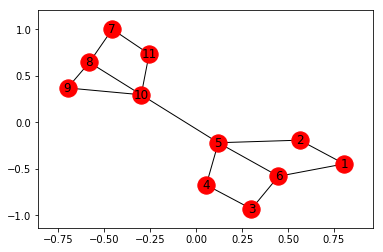

In [3]:
nx.draw_networkx(G,with_labels=True)

## Get adjacency matrix and treat as samples-by-observations matrix to get distances 

In [4]:
a = nx.adj_matrix(G).todense()

### Single Linkage

/Users/ras/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


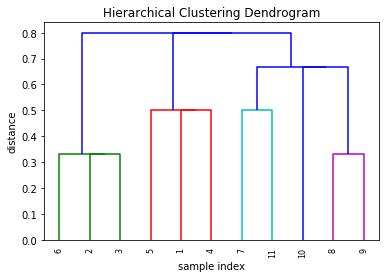

In [5]:
Z = linkage(np.array(a),'single',metric='jaccard')

plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(list(map(lambda x: str(int(x)+1),labels)))

plt.show()


## Ward method

/Users/ras/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


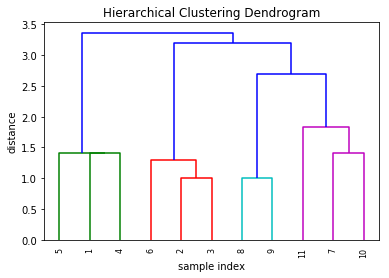

In [6]:
Z = linkage(a,'ward')

plt.figure()

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')


dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(list(map(lambda x: str(int(x)+1),labels)))


plt.show()

#ax.set_xticklabels(int(list(ax.get_xticklabels()

## Kmeans Cluster

In [7]:
from  sklearn.cluster import KMeans

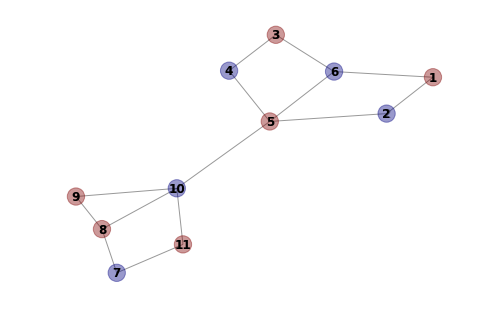

In [8]:
K = KMeans(n_clusters=2,n_init=100)

K.fit(a)

pos = nx.spring_layout(G)

nx.draw(G,node_color = K.labels_,
        cmap=plt.get_cmap('jet'),with_labels=True,pos=pos,alpha=0.4)

labels=nx.draw_networkx_labels(G,pos=pos,font_weight='bold')

Even with giving KMeans clustering the knowledge of having only 2 clusters, it completely gets it completely wrong.

## Community Detection algorithm

## Louivan Method

The Louivan Method is a community detection algorithm that tries to maximize the modularity of the graph, a metric representing number of nodes within a cluster relative to between clusters. The package is described here: https://github.com/taynaud/python-louvain/ and you can read up on the method on Wikipedia. https://en.wikipedia.org/wiki/Louvain_Modularity

In [9]:
import community

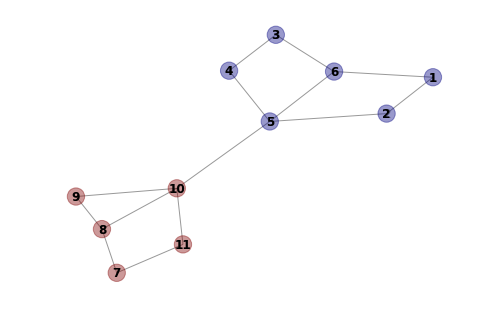

In [10]:
part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values, with_labels=True,alpha=0.4,pos=pos)

labels=nx.draw_networkx_labels(G,pos=pos,font_weight='bold')

## Givan Newman algorithm
I will not plot the results, just list the clusters to show the hierarchical nature the algorithm uncovers

In [11]:
from networkx.algorithms.community.centrality import girvan_newman

In [12]:
girvan = list(girvan_newman(G))[::-1]
girvan

[({1}, {2}, {6}, {5}, {3}, {4}, {7}, {8}, {11}, {9}, {10}),
 ({1}, {2}, {6}, {5}, {3}, {4}, {7}, {8}, {11}, {9, 10}),
 ({1}, {2}, {6}, {5}, {3}, {4}, {7}, {8, 9, 10}, {11}),
 ({1}, {2}, {6}, {5}, {3}, {4}, {7, 11}, {8, 9, 10}),
 ({1}, {2}, {6}, {5}, {3, 4}, {7, 11}, {8, 9, 10}),
 ({1}, {2}, {5, 6}, {3, 4}, {7, 11}, {8, 9, 10}),
 ({1, 2}, {5, 6}, {3, 4}, {7, 11}, {8, 9, 10}),
 ({1, 2}, {3, 4, 5, 6}, {7, 11}, {8, 9, 10}),
 ({1, 2}, {3, 4, 5, 6}, {7, 8, 9, 10, 11}),
 ({1, 2, 3, 4, 5, 6}, {7, 8, 9, 10, 11})]

## Conclusion
As we see, using the adjacency matrix as an oberservation matrix and clustering on that does not resolve the clusters we were looking for, whereas network clustering algorithms can find them. The distance metrics used were both jaccard and euclidean, and neither performed well. Now of course, discussing spectral clustering, which is an eigendecomposition on the Laplacian Matrix followed by a traditional clustering algorithm, versus other network community algorithms is another matter. 